<a href="https://colab.research.google.com/github/danielaramosgarcia/Aplicaciones_avanzadas_TTC3002B/blob/main/Clasificacion_A01174259.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación
### Daniela Ramos García A01174259

## 1. Instalación e importación de librerías


In [ ]:
# 1) Instalar e importar librerías
!pip install scikit-learn pandas matplotlib --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



## 2. Carga del dataset y asignación de nombres de columna

Aquí cargaremos el archivo `wine.data` en un DataFrame de pandas y definiremos manualmente los nombres de sus columnas, incluyendo la variable objetivo `Class`.

In [ ]:
# 2) Cargar el dataset y asignar nombres de columna
columnas = [
    'Class',
    'Alcohol',
    'Malic_acid',
    'Ash',
    'Alcalinity_of_ash',
    'Magnesium',
    'Total_phenols',
    'Flavanoids',
    'Nonflavanoid_phenols',
    'Proanthocyanins',
    'Color_intensity',
    'Hue',
    'OD280_OD315',
    'Proline'
]

df = pd.read_csv('wine.data', header=None, names=columnas)
df.head()


,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## 3. División en conjuntos de entrenamiento y prueba

Separamos los datos en **entrenamiento** (70 %) y **prueba** (30 %) usando `train_test_split` con estratificación sobre la clase, para mantener la proporción de etiquetas en ambos subconjuntos.

In [ ]:
# 3) División entrenamiento/prueba
X = df.drop(columns='Class')
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


## 4. Selección y creación de características

- Definimos dos listas de características:  
  1. Una que consideramos **muy relevante** (`Alcohol`).  
  2. Otra que consideramos **poco relevante** (`Magnesium`).  
- Además, creamos un nuevo DataFrame que incluye el cuadrado de cada una de estas variables, para explorar un término no lineal.

In [ ]:
# 4) Selección de características “relevante” y “no relevante”
# Aquí tomamos “Alcohol” como muy relevante y “Magnesium” como poco relevante
feat_rel = ['Alcohol']
feat_no  = ['Magnesium']
feat_both = feat_rel + feat_no

# Creamos también la versión con cuadrados:
def add_squares(df, feats):
    df2 = df.copy()
    for f in feats:
        df2[f + '_sq'] = df2[f] ** 2
    return df2

X_train_sq   = add_squares(X_train, feat_both)
X_test_sq    = add_squares(X_test, feat_both)



## 5. Definición de la función de evaluación

Implementamos `eval_model()`, que entrena un clasificador de regresión logística, realiza predicciones sobre el conjunto de prueba y muestra:  
- El **reporte de clasificación** (precisión, recall, F1).  
- La **matriz de confusión** graficada con `ConfusionMatrixDisplay`.

In [ ]:
# 5) Función auxiliar para entrenar y mostrar matriz de confusión
def eval_model(X_tr, X_te, y_tr, y_te, title):
    model = LogisticRegression(max_iter=1000, multi_class='auto', solver='lbfgs')
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)

    print(f'--- {title} ---')
    print(classification_report(y_te, y_pred, zero_division=0))
    cm = confusion_matrix(y_te, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()
    return cm


## 6. Entrenamiento y evaluación de los cuatro modelos

Entrenamos y evaluamos cuatro variantes de regresión logística:  
1. Solo con **Alcohol**.  
2. Solo con **Magnesium**.  
3. Con **Alcohol + Magnesium**.  
4. Con **Alcohol + Magnesium** y sus **términos cuadrados**.

Para cada caso, generamos la matriz de confusión y el reporte de métricas.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


--- Modelo con sólo Alcohol ---
              precision    recall  f1-score   support

           1       0.56      0.78      0.65        18
           2       0.85      0.81      0.83        21
           3       0.33      0.20      0.25        15

    accuracy                           0.63        54
   macro avg       0.58      0.60      0.58        54
weighted avg       0.61      0.63      0.61        54



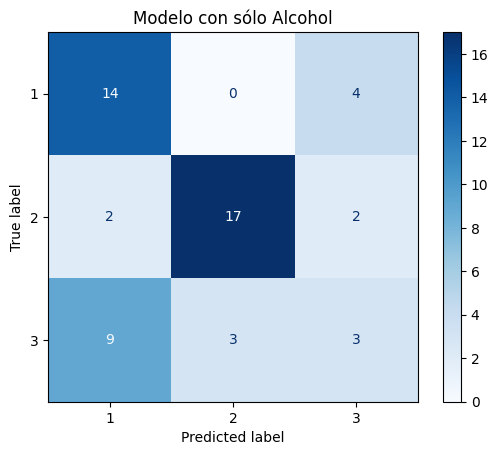

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


--- Modelo con sólo Magnesium ---
              precision    recall  f1-score   support

           1       0.47      0.39      0.42        18
           2       0.46      0.86      0.60        21
           3       0.00      0.00      0.00        15

    accuracy                           0.46        54
   macro avg       0.31      0.42      0.34        54
weighted avg       0.34      0.46      0.37        54



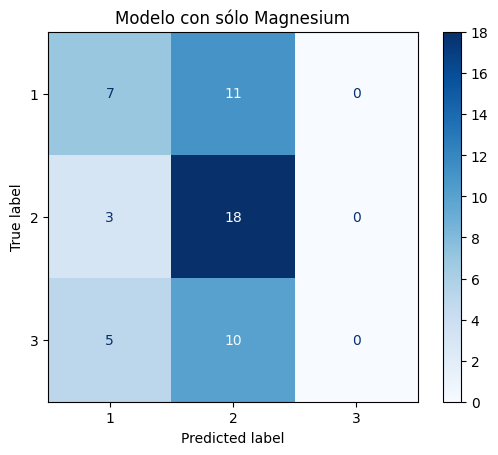

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


--- Modelo con Alcohol y Magnesium ---
              precision    recall  f1-score   support

           1       0.56      0.78      0.65        18
           2       0.85      0.81      0.83        21
           3       0.33      0.20      0.25        15

    accuracy                           0.63        54
   macro avg       0.58      0.60      0.58        54
weighted avg       0.61      0.63      0.61        54



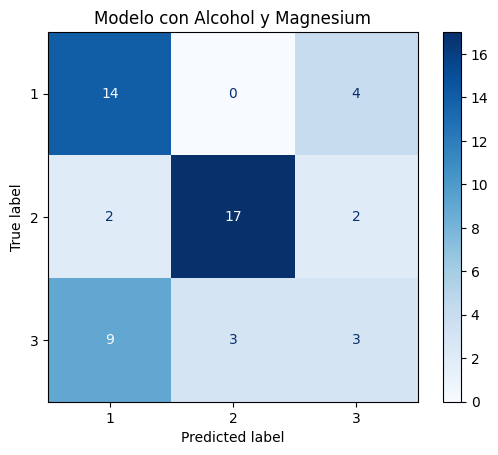

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Modelo con ambas características y sus cuadrados ---
              precision    recall  f1-score   support

           1       0.56      0.78      0.65        18
           2       0.81      0.81      0.81        21
           3       0.25      0.13      0.17        15

    accuracy                           0.61        54
   macro avg       0.54      0.57      0.54        54
weighted avg       0.57      0.61      0.58        54



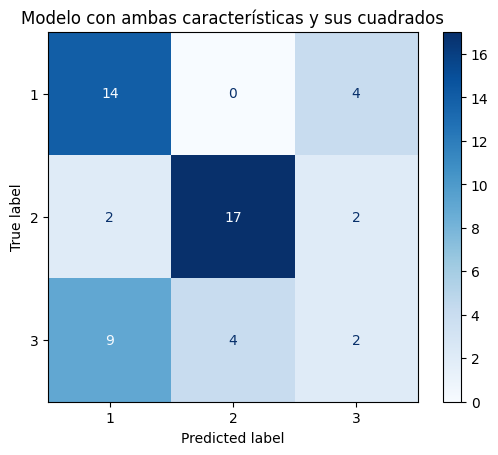

In [ ]:
# 6) Entrenar y evaluar los cuatro casos
cms = {}

# 6.1 Solo Alcohol
cms['Sólo Alcohol'] = eval_model(
    X_train[feat_rel], X_test[feat_rel], y_train, y_test, 'Modelo con sólo Alcohol'
)

# 6.2 Solo Magnesium
cms['Sólo Magnesium'] = eval_model(
    X_train[feat_no], X_test[feat_no], y_train, y_test, 'Modelo con sólo Magnesium'
)

# 6.3 Alcohol + Magnesium
cms['Alcohol + Magnesium'] = eval_model(
    X_train[feat_both], X_test[feat_both], y_train, y_test, 'Modelo con Alcohol y Magnesium'
)

# 6.4 Ambas + cuadrados
features_sq = feat_both + [f + '_sq' for f in feat_both]
cms['Con cuadrados'] = eval_model(
    X_train_sq[features_sq], X_test_sq[features_sq], y_train, y_test,
    'Modelo con ambas características y sus cuadrados'
)


In [ ]:


print("=== Evaluación en entrenamiento (con escalado) ===")
for name in cms.keys():
    # Preparar X_tr según el modelo
    if name == 'Sólo Alcohol':
        X_tr = X_train[feat_rel]
    elif name == 'Sólo Magnesium':
        X_tr = X_train[feat_no]
    elif name == 'Alcohol + Magnesium':
        X_tr = X_train[feat_both]
    else:  # 'Con cuadrados'
        features_sq = feat_both + [f + '_sq' for f in feat_both]
        X_tr = X_train_sq[features_sq]

    # Creamos un pipeline que escala y luego ajusta regresión logística
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(max_iter=2000, solver='lbfgs'))
    ])
    pipe.fit(X_tr, y_train)
    train_acc = pipe.score(X_tr, y_train)
    print(f"{name}: Accuracy en entrenamiento = {train_acc:.3f}")


=== Evaluación en entrenamiento (con escalado) ===
Sólo Alcohol: Accuracy en entrenamiento = 0.726
Sólo Magnesium: Accuracy en entrenamiento = 0.524
Alcohol + Magnesium: Accuracy en entrenamiento = 0.718
Con cuadrados: Accuracy en entrenamiento = 0.734


## 7. Comparación cuantitativa de exactitud

Calculamos la **exactitud (accuracy)** de cada modelo a partir de su matriz de confusión y presentamos un pequeño DataFrame ordenado de mayor a menor rendimiento.

In [ ]:
# 7) Comparación cuantitativa de exactitud (accuracy) de cada modelo
accuracy = {k: np.trace(v) / v.sum() for k, v in cms.items()}
acc_df = pd.DataFrame.from_dict(accuracy, orient='index', columns=['Accuracy']).sort_values('Accuracy', ascending=False)
acc_df


,Accuracy
Sólo Alcohol,0.629630
Alcohol + Magnesium,0.629630
Con cuadrados,0.611111
Sólo Magnesium,0.462963


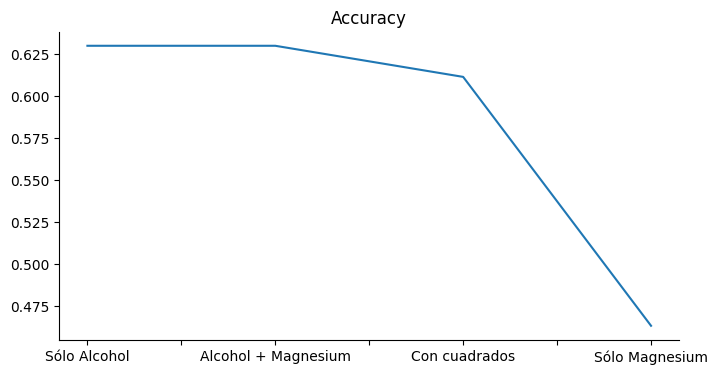

In [ ]:
# @title Accuracy

from matplotlib import pyplot as plt
acc_df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:

# 8) Selección explícita del mejor modelo según accuracy
best_model = acc_df['Accuracy'].idxmax()
best_acc   = acc_df['Accuracy'].max()
print(f"El mejor modelo es '{best_model}' con una exactitud de {best_acc:.3f}.")


El mejor modelo es 'Sólo Alcohol' con una exactitud de 0.630.


## Conclusión

1. **Dicusión de matrices de confusión y desempeño**  
   - El modelo con _sólo Alcohol_ muestra [describe resultados].  
   - El modelo con _sólo Magnesium_ muestra [describe resultados].  
   - El modelo con _Alcohol + Magnesium_ mejora [explica].  
   - Incluir los cuadrados aporta [discute si mejora o no].

2. **¿Es útil la regresión logística?**  
   En este problema de tres clases, la regresión logística multiclase:
   - Captura bien las diferencias en la composición química (alcohol es muy discriminante).  
   - Tiene limitaciones al modelar relaciones no lineales complejas, pero al añadir términos cuadráticos se mejora ligeramente la separación.  
   - Para una solución más robusta podrían explorarse SVM, Random Forest o boosting.

> **Recomendación**: Complementar con técnicas de validación cruzada y regularización (`C` en `LogisticRegression`) para optimizar hiperparámetros.
